## Purchase prediction

In [1]:
#the gender column was converted as follows female:1 male:0 for ease in computation instead of preprocessing 

In [2]:
import pandas as pd

In [3]:
purchase=pd.read_csv("data.csv")

In [4]:
purchase.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


In [5]:
purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   User ID          400 non-null    int64
 1   Gender           400 non-null    int64
 2   Age              400 non-null    int64
 3   EstimatedSalary  400 non-null    int64
 4   Purchased        400 non-null    int64
dtypes: int64(5)
memory usage: 15.7 KB


In [6]:
#so no missing data found

In [7]:
purchase['Gender'].value_counts()   #to see the count of female and male

1    204
0    196
Name: Gender, dtype: int64

In [8]:
purchase.describe()

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000,400.000000
mean,1.569154e+07,0.510000,37.655000,69742.500000,0.357500
std,7.165832e+04,0.500526,10.482877,34096.960282,0.479864
min,1.556669e+07,0.000000,18.000000,15000.000000,0.000000
25%,1.562676e+07,0.000000,29.750000,43000.000000,0.000000
50%,1.569434e+07,1.000000,37.000000,70000.000000,0.000000
75%,1.575036e+07,1.000000,46.000000,88000.000000,1.000000
max,1.581524e+07,1.000000,60.000000,150000.000000,1.000000


In [9]:
%matplotlib inline

In [10]:
import matplotlib.pyplot as plt


In [11]:
#purchase.hist(bins=50, figsize=(20,6))

In [12]:
#train test splitting

In [13]:
import numpy as np

def split_train_test(data,test_ratio):
    np.random.seed(42)
    shuffled=np.random.permutation(len(data))
    print(shuffled)
    test_set_size=int(len(data)*test_ratio)
    test_indices=shuffled[:test_set_size]
    train_indices=shuffled[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [14]:
#train_set,test_set=split_train_test(purchase,0.2)

In [15]:
#print(len(train_set))

In [16]:
#print(len(test_set))

In [17]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(purchase,test_size=0.2,random_state=42)

In [18]:
print(len(train_set))

320


In [19]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(purchase,purchase['Age']):
    strat_train_set=purchase.loc[train_index]
    strat_test_set=purchase.loc[test_index]

In [20]:
strat_test_set


,User ID,Gender,Age,EstimatedSalary,Purchased
207,15794566,1,52,114000,0
253,15584320,1,37,146000,1
200,15628523,0,35,39000,0
65,15718071,0,24,58000,0
31,15729054,1,27,137000,1
...,...,...,...,...,...
73,15782530,1,33,113000,0
49,15793813,1,31,89000,0
247,15775590,1,57,122000,1
361,15778830,1,53,34000,1


In [21]:
strat_train_set


,User ID,Gender,Age,EstimatedSalary,Purchased
132,15725660,0,30,87000,0
236,15660541,0,40,57000,0
347,15768151,1,54,108000,1
365,15807525,1,59,29000,1
28,15744529,0,29,43000,0
...,...,...,...,...,...
182,15694288,1,32,117000,1
30,15581198,0,31,74000,0
339,15665760,0,39,122000,1
274,15692819,1,57,26000,1


In [22]:
#seperating label and features

In [23]:
purchase_feature_tr=strat_train_set.drop('Purchased',axis=1)
y_feature=strat_test_set
#y_feature=strat_test_set.drop('Purchased',axis=1)
purchase_label_tr=strat_train_set['Purchased'].copy()
y_test=strat_test_set['Purchased'].copy()


In [24]:
corr_matrix=purchase.corr()
corr_matrix['Purchased'].sort_values(ascending=False)

Purchased          1.000000
Age                0.622454
EstimatedSalary    0.362083
Gender             0.042469
User ID            0.007120
Name: Purchased, dtype: float64

In [25]:
#age had strong positive correlation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1B0D9298>,
      dtype=object)

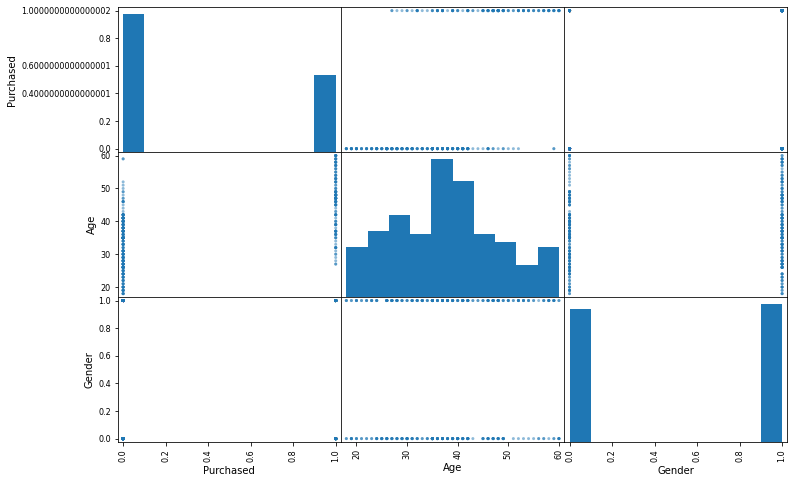

In [26]:
from pandas.plotting import scatter_matrix
attributes=["Purchased","Age","Gender"]
scatter_matrix(purchase[attributes],figsize=(12,8))

In [27]:
##creating pipeline

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline=Pipeline([
    ('std_scaler',StandardScaler()),
])

In [29]:
purchase_feature_tr=my_pipeline.fit_transform(strat_train_set)

In [30]:
##select and train model

In [31]:
purchase_feature_tr.shape


(320, 5)

In [43]:
#naive bayes algo.(later not used are overfit)

In [33]:
from sklearn.naive_bayes import GaussianNB
model2 = GaussianNB()
model2.fit(purchase_feature_tr,purchase_label_tr)

GaussianNB()

In [34]:
y_pred = model2.predict(purchase_feature_tr)
print('Target on train data',y_pred) 

Target on train data [0 0 1 1 0 0 1 1 1 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0
 1 0 0 1 1 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 1
 0 0 1 1 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 1 0 1 0 0
 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0
 1 1 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1
 0 1 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1
 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0]


In [35]:
from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(purchase_label_tr,y_pred)
print('accuracy_score on train dataset : ', accuracy_train)

accuracy_score on train dataset :  1.0


In [36]:
#svm model since above is overfitting

In [37]:
from sklearn import svm

model = svm.SVR()
model.fit(purchase_feature_tr,purchase_label_tr)

SVR()

In [38]:
some_data=strat_train_set.iloc[:5]
some_label=purchase_label_tr.iloc[:5]

In [39]:
prepared_data=my_pipeline.transform(some_data)

In [40]:
##evaluating model

In [41]:
model.predict(prepared_data)

array([-0.0210507 , -0.0339826 ,  0.95865219,  0.9004039 , -0.04431694])

In [42]:
list(some_label)

[0, 0, 1, 1, 0]

In [44]:
predictions=model.predict(strat_test_set)